In [2]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# length_weight = pd.read_csv("https://gitlab.com/ntnu-tdat3025/regression/childgrowth-datasets/raw/master/length_weight.csv")
length_weight = pd.read_csv("./length_weight.csv")
length_weight_train = length_weight.sample(frac=0.8, random_state=200)
length_weight_test = length_weight.drop(length_weight_train.index)

print(length_weight_train.head(10))

     # length     weight
674      65.6   7.881935
233      83.3  12.733374
739      76.3   9.442255
865      82.5   9.948176
523      54.6   4.437886
726      72.3   9.320447
473      98.8  15.175686
501      73.3   8.929859
570     108.9  20.647252
346     107.0  18.453163


In [4]:
x_train_tensor = torch.tensor(length_weight_train["# length"].values).reshape(-1,1).float()
y_train_tensor = torch.tensor(length_weight_train['weight'].values).reshape(-1,1).float()
x_test = torch.tensor(length_weight_test['# length'].values).reshape(-1,1).float()
y_test = torch.tensor(length_weight_test['weight'].values).reshape(-1,1).float()

# print(x_train, y_train, sep='\n')

In [5]:
class LinearRegressionModel:
    def __init__(self):
        # Model variables
        self.W = torch.randn((1,1), requires_grad=True)  # requires_grad enables calculation of gradients
        self.b = torch.randn((1,1), requires_grad=True)

    # Predictor
    def f(self, x):
        return x @ self.W + self.b  # @ corresponds to matrix multiplication
    
    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x), y)  # Can also use torch.nn.functional.mse_loss(self.f(x), y) to possibly increase numberical stability

In [6]:
model = LinearRegressionModel()
# optimizer = torch.optim.Adagrad([model.W, model.b], lr=50) # Gives loss less than 1
optimizer = torch.optim.SGD([model.W, model.b], lr=0.00015)


In [7]:
# Training
for epoch in range(20000):
	model.loss(x_train_tensor, y_train_tensor).backward()

	# with torch.no_grad():
	# 	model.W -= 0.01 * model.W.grad
	# 	model.b -= 0.01 * model.b.grad
	optimizer.step()

	# model.W.grad.zero_()
	# model.b.grad.zero_()
	optimizer.zero_grad()

In [8]:
print(model.W, model.b, model.loss(x_train_tensor, y_train_tensor))

tensor([[0.1696]], requires_grad=True) tensor([[-2.7962]], requires_grad=True) tensor(2.8059, grad_fn=<MseLossBackward>)


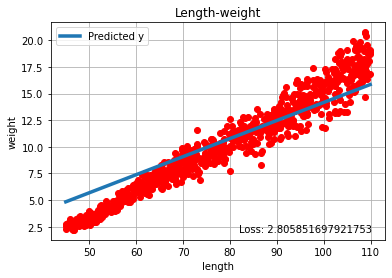

In [9]:
plt.plot(x_train_tensor, y_train_tensor, 'ro')
plt.title("Length-weight")
plt.xlabel('length')
plt.ylabel('weight')
x = torch.tensor([[torch.min(x_train_tensor)], [torch.max(x_train_tensor)]])
plt.plot(x, model.f(x).detach(), linewidth=3.5, label="Predicted y")
plt.legend()
plt.text(82, 2, f'Loss: {model.loss(x_train_tensor, y_train_tensor)}')
plt.grid()
